**COVID-19 India Data
: This dataset contains details about the COVID-19 cases in India, including daily updates on the number of confirmed cases, recoveries, and deaths.**

**COVID-19 Vaccine Statewise Data
: This dataset provides information on the COVID-19 vaccination progress in different states of India, including the number of doses administered and the number of individuals vaccinated.**

**Statewise Testing Details
: This dataset includes statewise testing statistics for COVID-19, such as the number of tests conducted and the dates on which they were performed.**

**IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

**Now we will load the dataset and reading the data in the form of csv.**

In [2]:
Covid_data = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv')
Testing_details = pd.read_csv('/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv')
Statewise_vaccine = pd.read_csv('/kaggle/input/covid19-in-india/covid_vaccine_statewise.csv')
#We are reading the data.
Covid_data


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


**Exploring the dataset shapes and datatypes.**

In [3]:
#Exploring the dataset.
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


**We are loading the data to see the basic statistics.**

In [4]:
Covid_data.describe() #Now we are reading the basic statistics of the dataset.

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


**We are dropping unnecessary columns from the dataset for analysis.**

In [5]:
#Dropping unnecessary columns
Covid_data.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace = True, axis = 1)

**We are cleaning up the state/Union Territory names.**

In [6]:
# Clean up State/UnionTerritory names
Covid_data['State/UnionTerritory'] = Covid_data['State/UnionTerritory'].str.replace('[*]+', '', regex=True).str.strip()

**Loading top 5 rows of the data after dropping unnecessary columns.**

In [7]:
#Top 5 rows in the dataset
Covid_data.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


**Now we are changing the datatype of the date column.**

In [8]:
#We are changing the datatype of update on column.
Statewise_vaccine['Updated On'] = pd.to_datetime(Statewise_vaccine['Updated On'], format = "%d/%m/%Y")

In [9]:
#We are changing the datatype of date column.
Covid_data['Date'] = pd.to_datetime(Covid_data['Date'], format = '%Y-%m-%d')


**Now we are creating a new column for total number of active cases.**

In [10]:
#Creating a new column of active cases
Covid_data['Active_Cases'] = Covid_data['Confirmed'] - (Covid_data['Cured'] + Covid_data['Deaths'])


**Question 1: What is the trend of COVID-19 cases over time?**

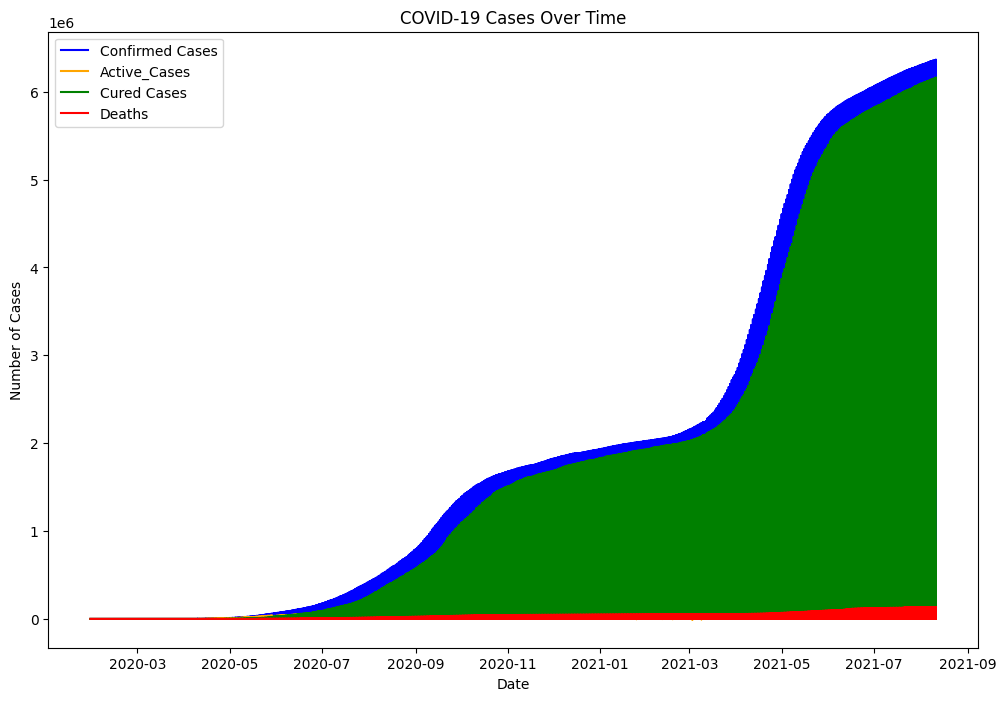

In [11]:
#Creating visualization for Question 1
plt.figure(figsize=(12, 8))
plt.plot(Covid_data['Date'], Covid_data['Confirmed'], label='Confirmed Cases', color='blue') #Creating a plot of confirmed cases
plt.plot(Covid_data['Date'], Covid_data['Active_Cases'], label='Active_Cases', color='orange') #Creating a plot of active cases
plt.plot(Covid_data['Date'], Covid_data['Cured'], label='Cured Cases', color='green') #Creating a plot of cured cases
plt.plot(Covid_data['Date'], Covid_data['Deaths'], label='Deaths', color='red') #Creating a plot of death cases
plt.title('COVID-19 Cases Over Time')  #labelling the data
plt.xlabel('Date') #labelling the x-label
plt.ylabel('Number of Cases')  #labelling the y-label
plt.legend()
plt.show()

**The line plot shows the trends of confirmed cases, active cases, cured cases, and deaths over time.**

**# Question 2: State-wise death rate (Deaths / Confirmed)**

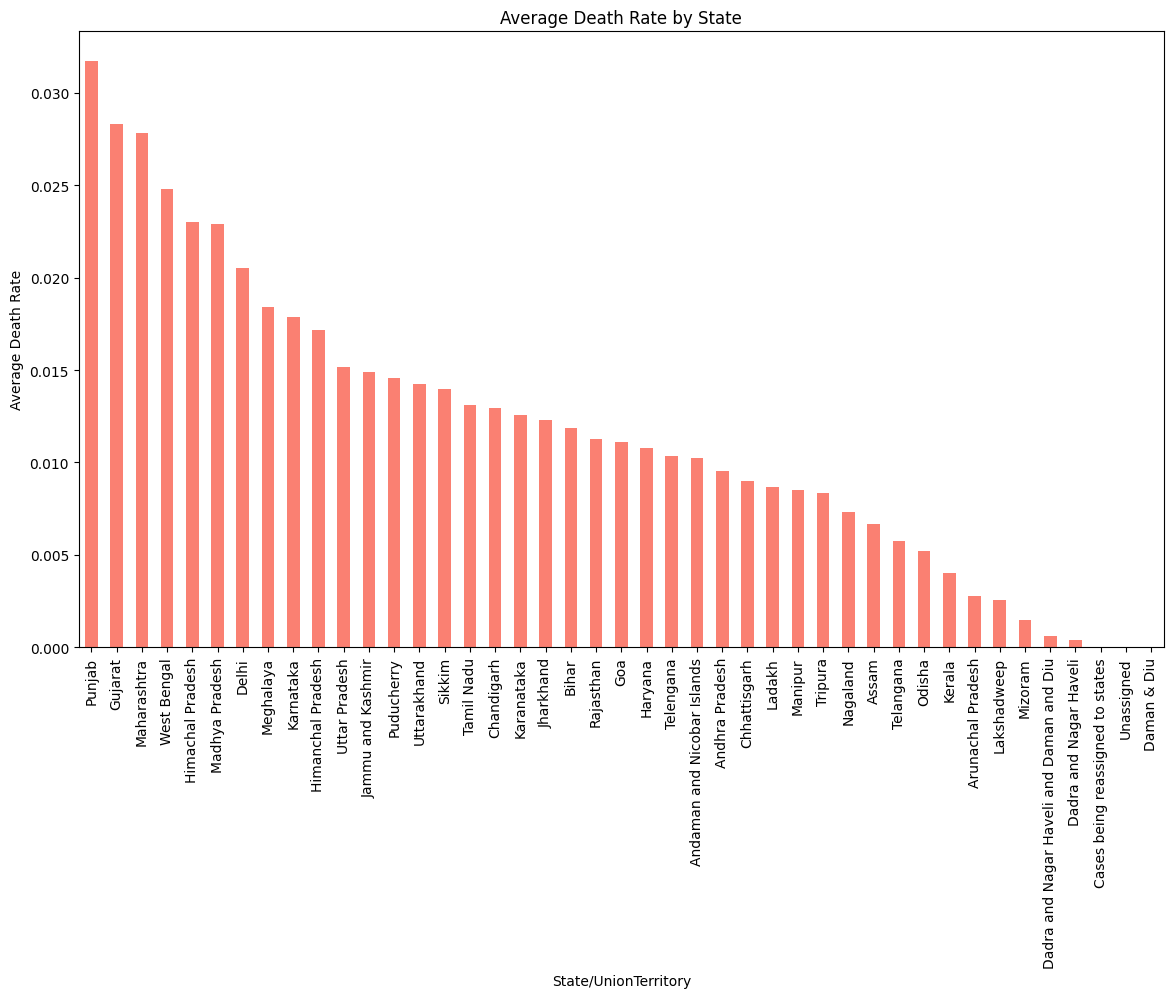

In [12]:
#State-wise death rate.
Covid_data['Death Rate'] = Covid_data['Deaths'] / Covid_data['Confirmed']
state_wise_death_rate = Covid_data.groupby('State/UnionTerritory')['Death Rate'].mean().sort_values(ascending=False)

#Creating visualization for Question 2
plt.figure(figsize=(14, 8))
state_wise_death_rate.plot(kind='bar', color='salmon') #We are creating a bar plot
plt.title('Average Death Rate by State')  #labelling the data
plt.xlabel('State/UnionTerritory')   #labelling the x-label
plt.ylabel('Average Death Rate')   #labelling the y-label
plt.show()

**The bar chart illustrates the average death rate across different states/union territories.**

**# Question 3: Top 10 states with the highest number of cured cases**

Text(0, 0.5, 'Total')

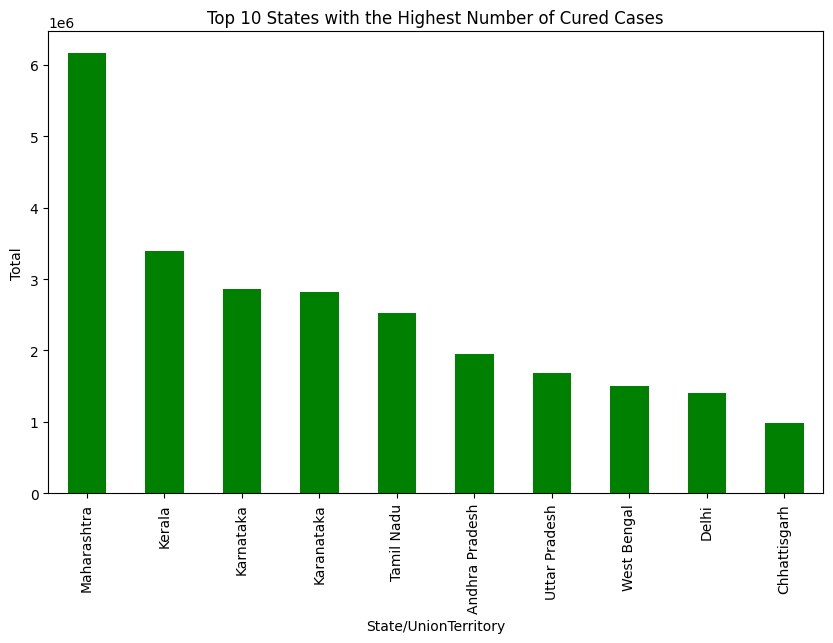

In [13]:
#Top 10 cured cases.
top_cured_states = Covid_data.groupby('State/UnionTerritory')['Cured'].max().nlargest(10)

#Creating visualization for Question 3
plt.figure(figsize=(10, 6))
top_cured_states.plot(kind='bar', color='green') #We are creating a bar plot
plt.title('Top 10 States with the Highest Number of Cured Cases') #labelling the data
plt.xlabel('State/UnionTerritory') #labelling the x-label
plt.ylabel('Total')   #labelling the y-label

**The bar chart highlights the states with the highest number of cured cases.**

**Question 4: How does the percentage of male vaccinations compare to that of females and transgender individuals?**

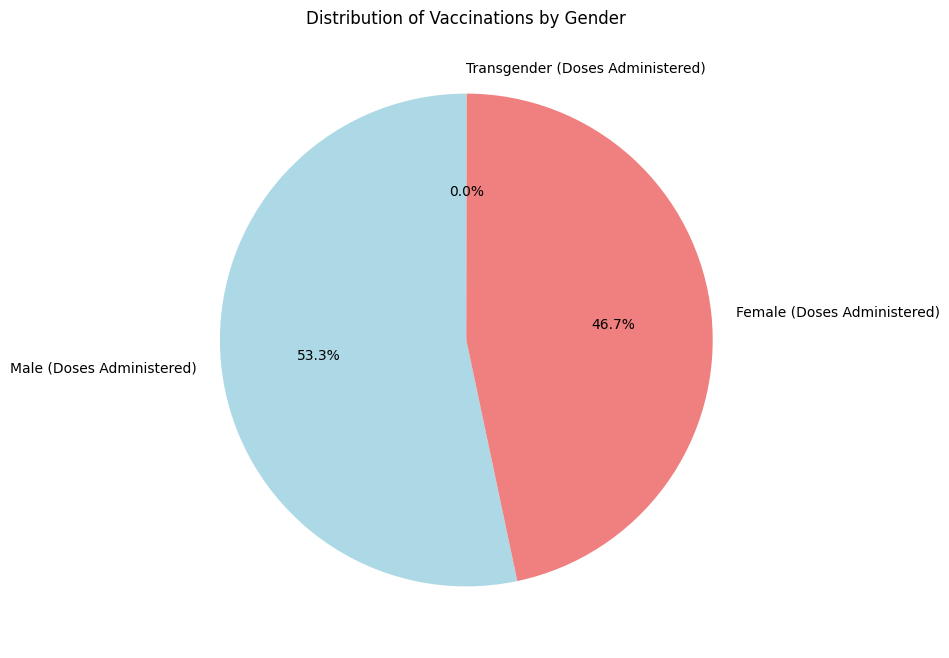

In [14]:
#Vaccinations by gender.
gender_counts = Statewise_vaccine[['Male (Doses Administered)', 'Female (Doses Administered)', 'Transgender (Doses Administered)']].sum()

#Creating visualization for Question 4
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['lightblue', 'lightcoral', 'lightgreen'])  #Creating a pie chart
plt.title('Distribution of Vaccinations by Gender') #labelling the data
plt.show()

**The pie chart represents the distribution of vaccinations by gender, showing the percentage of doses administered to males, females, and transgender individuals.**

**Question 5: What are the vaccination coverage in different states?**

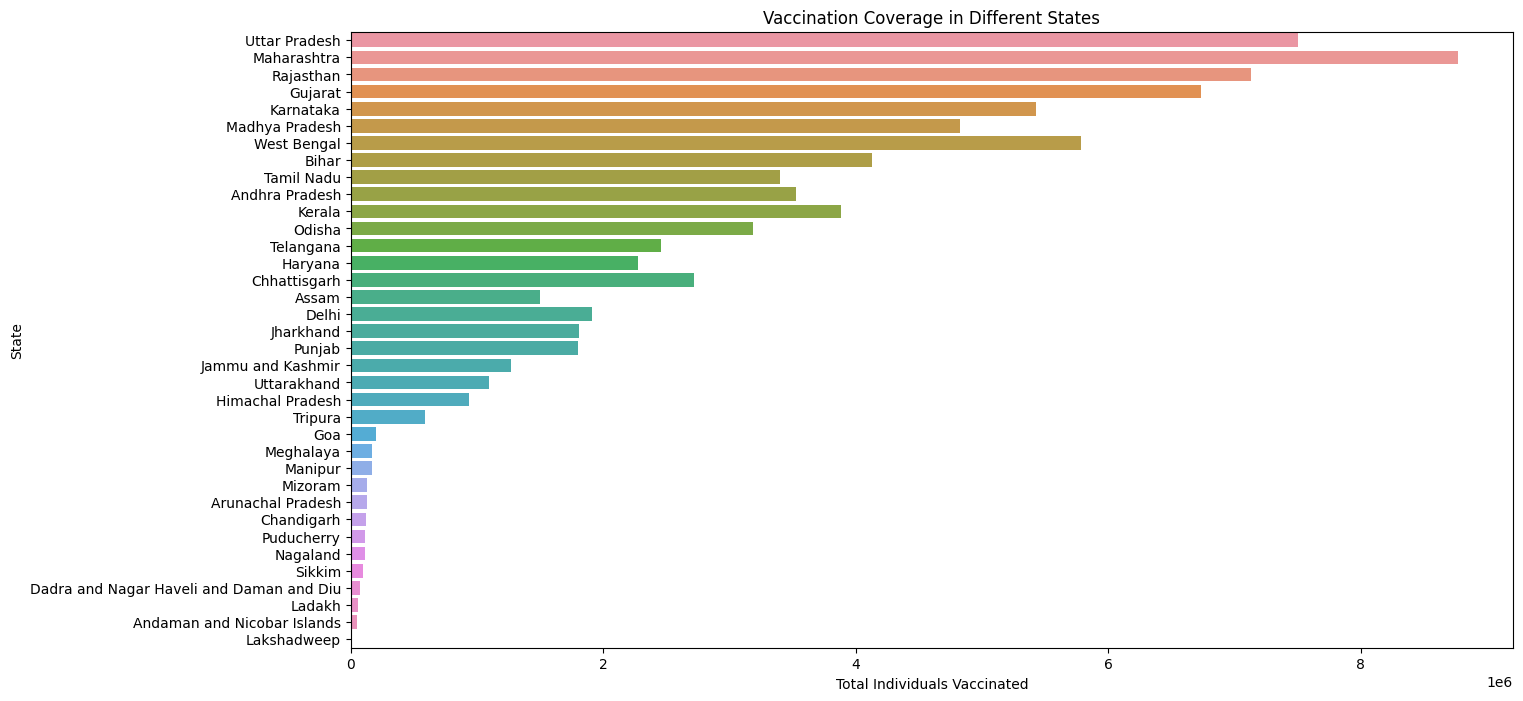

In [15]:
# Filter out rows where State is 'India'
filtered_test_df = Statewise_vaccine[Statewise_vaccine['State'] != 'India']

#Creating visualization for Question 5
plt.figure(figsize=(15, 8))
sns.barplot(x='Total Individuals Vaccinated', y='State', data=filtered_test_df.sort_values
            ('Total Individuals Vaccinated', ascending=False), errorbar=None) #Creating a barplot
plt.title('Vaccination Coverage in Different States')  #labelling the data
plt.xlabel('Total Individuals Vaccinated')   #labelling the x-label
plt.ylabel('State')    #labelling the x-label
plt.show()

**The bar plot displays the vaccination coverage in different states, showcasing the total number of individuals vaccinated.**

**Question 6: What is the observed relationship between the total number of COVID-19 cases and the total doses of the vaccine administered?**

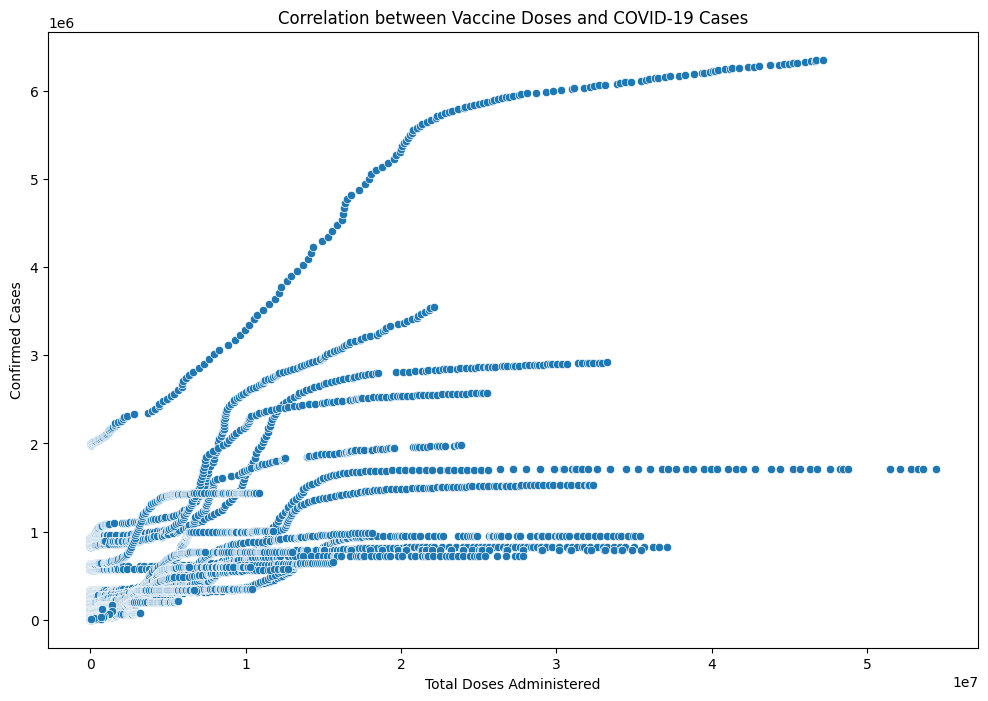

In [16]:
#Creating the relationship between covid- 19 cases and vaccine doses
merged_df = pd.merge(Covid_data, Statewise_vaccine, left_on=['Date', 'State/UnionTerritory'], right_on=['Updated On', 'State'])

#Creating visualization for Question 6
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Doses Administered', y='Confirmed', data=merged_df)
plt.title('Correlation between Vaccine Doses and COVID-19 Cases')   ##labelling the the data
plt.xlabel('Total Doses Administered')   #labelling the x-label
plt.ylabel('Confirmed Cases')    #labelling the y-label
plt.show()

**The scatter plot explores the correlation between the total number of COVID-19 cases and the total doses of the vaccine administered.**

**SUMMARY**

**The analysis provides valuable insights into the trends of COVID-19 cases, death rates, cured cases, vaccination coverage, and the relationship between COVID-19 cases and vaccination efforts. Understanding these patterns is crucial for making informed decisions, allocating resources effectively, and implementing targeted interventions.**